In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

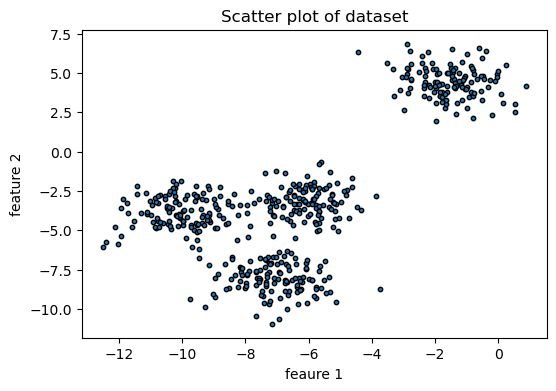

In [54]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

x1 = [i[0] for i in X]
x2 = [i[1] for i in X]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x1, x2, alpha=1, s=10, edgecolor='k')
ax.set_title("Scatter plot of dataset")
ax.set_xlabel("feaure 1")
ax.set_ylabel("feature 2")
plt.show()

In [5]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    sum_sq_vals_list = []
    for i in range(X.shape[0]):
        for j in range(K):
            vals = X[i] - centroids[j]
            sum_sq_vals = sum([k**2 for k in vals])
            sum_sq_vals_list.append(sum_sq_vals)
        index = sum_sq_vals_list.index(min(sum_sq_vals_list))
        idx[i] = index
        sum_sq_vals_list = []
    return idx

In [21]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for j in range(len(idx)):
        centroids[idx[j]] += X[j]
    for k in range(K):
        class_count = np.count_nonzero(idx == k)
        centroids[k] /= class_count
    return centroids

In [23]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i + 1, max_iters))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

In [52]:
initial_centroids = np.array([[-4,-3],[-2,-7],[2,3],[-12,0]])
max_iters = 10
centroids, idx = run_kMeans(X, initial_centroids, max_iters)

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


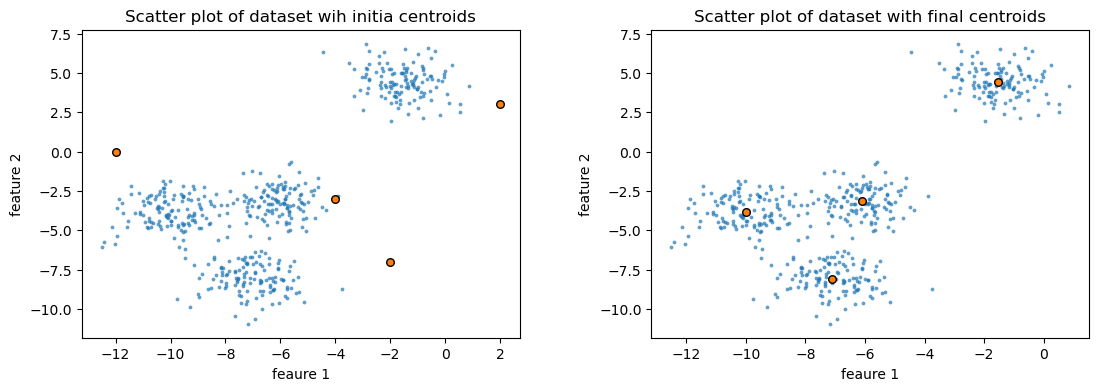

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].scatter(x1, x2, marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')
ax[0].scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='o', s=30, alpha=1, edgecolor='k')
ax[0].set_title("Scatter plot of dataset wih initia centroids")
ax[0].set_xlabel("feaure 1")
ax[0].set_ylabel("feature 2")
ax[1].scatter(x1, x2, marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o', s=30, alpha=1, edgecolor='k')
ax[1].set_title("Scatter plot of dataset with final centroids")
ax[1].set_xlabel("feaure 1")
ax[1].set_ylabel("feature 2")
plt.subplots_adjust(wspace=0.3)
plt.show()